In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [4]:
l = LogisticRegression()
l?

In [5]:
sgd = SGDClassifier()
sgd?

# L1 Penalty and Sparsity in Logistic Regression

Comparision of sparsity. i.e. percentage of zero coefficients.
for L1 and L2 Penalization for different value of C.

#### Import Statements


In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


s = "\nDone(*_*)"
print(s)


Done(*_*)


#### Loading data

In [7]:
data = load_digits()

X,y = data.data,data.target

print(X.shape)
print(y)
print(s)

(1797, 64)
[0 1 2 ..., 8 9 8]

Done(*_*)


#### Transforming data

In [8]:
X = StandardScaler().fit_transform(X)
y_ = ( y > 4).astype(np.int)

#print(y_[800:])
print(s)



Done(*_*)


#### Fitting model

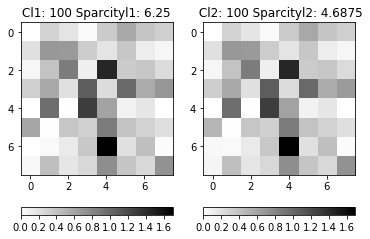

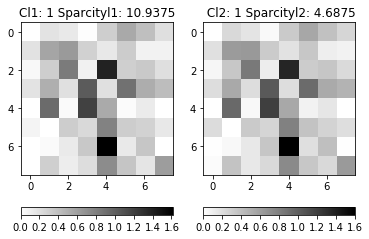

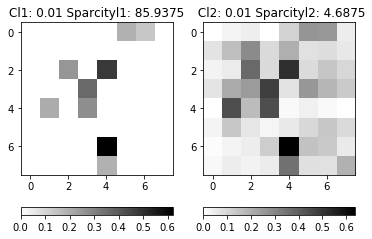

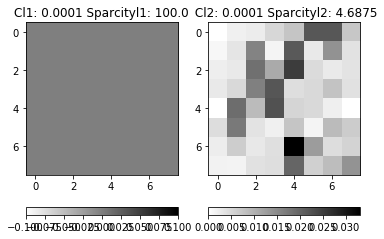

In [9]:
for i, C in enumerate((100,1,.01,.0001)):
    clf_l1 = LogisticRegression(C=C,penalty="l1")
    clf_l2 = LogisticRegression(C=C,penalty='l2')
    clf_l1 = clf_l1.fit(X,y_)
    clf_l2 = clf_l2.fit(X,y_)
    sparcity1 = np.mean(clf_l1.coef_.ravel() == 0)*100
    sparcity2 = np.mean(clf_l2.coef_.ravel() == 0)*100
    fig, ax = plt.subplots(2,2)
    plt.subplot(1,2,1)
    plt.imshow(np.abs(clf_l1.coef_.ravel().reshape(8,8)),interpolation="nearest",cmap="binary")
    plt.colorbar(orientation="horizontal")
    plt.title("Cl1: "+str(clf_l1.C)+" Sparcityl1: "+str(sparcity1))
    plt.subplot(1,2,2)
    plt.imshow(np.abs(clf_l2.coef_.ravel().reshape(8,8)),interpolation="nearest",cmap="binary")
    plt.colorbar(orientation="horizontal")
    plt.title(" Cl2: "+str(clf_l2.C)+" Sparcityl2: "+str(sparcity2))
    plt.show()

# Path with L1- Logistic Regression

Ploting the path of the coefficients of the model by varying the parameter "C"

#### Import Statements

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.svm import l1_min_c

s = "\nDone(*_*)"
print(s)


Done(*_*)


#### Loading data

In [11]:
data = load_iris()
X,y = data.data,data.target

## removing third class
X = X[y != 2]
y = y[y != 2]

#print(X[:10])
#print(np.mean(X[1]))
#print(np.mean(X,axis=0))
#print(X[0] == np.min(X[0]))
X = X - np.mean(X,axis=0)

#print(np.max(X,axis=0))
#print(X[:,0])
#print(X.shape,y.shape)
print(s)


Done(*_*)


Iris data has 4 features and in total 150 samples

In [12]:
## About data
print(X.shape)
print(np.unique(y))
print(data.feature_names)
print(data.target_names)

(100, 4)
[0 1]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


#### Model fitting

In [20]:
cs = l1_min_c(X,y,loss="log")*np.logspace(0,3)
#print(cs)
coefs = []
for c in cs:
    clf_l1 = LogisticRegression(C=c,penalty='l1').fit(X,y)
    #print(clf_l1.coef_)
    coefs.append(clf_l1.coef_.ravel())
"""
LR_model = LogisticRegression().fit(X,y)
print(LR_model.coef_)
"""
print(s)


Done(*_*)


#### Plotting the coefficients

[ 0.         0.         0.1781367  0.       ]
[  0.01430615   0.01647204   0.01896583   0.02183717   0.02514321
   0.02894978   0.03333264   0.03837905   0.04418946   0.05087955
   0.05858248   0.06745159   0.07766345   0.08942134   0.10295932
   0.11854689   0.13649435   0.15715896   0.18095211   0.20834742
   0.23989026   0.27620854   0.31802525   0.36617281   0.42160969
   0.48543945   0.55893275   0.6435526    0.7409835    0.853165
   0.98233025   1.13105053   1.30228638   1.49944654   1.72645585
   1.98783333   2.28878215   2.63529323   3.0342645    3.49363819
   4.02255894   4.63155586   5.3327521    6.14010624   7.06969007
   8.14000863   9.37236848  10.79130195  12.42505542  14.30615165]


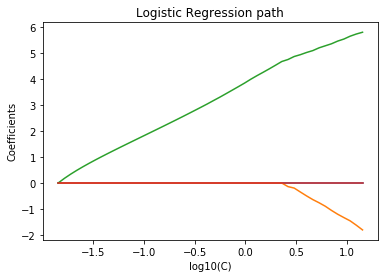

In [27]:
#print(LR_model.coef_[0].shape)
print((coefs[1]))
print(cs)
plt.plot(np.log10(cs),coefs)
plt.xlabel("log10(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression path")
plt.show()

#### Model fitting with warm start: i.e. using the coefficints value of the previous call

In [61]:
cs2 = l1_min_c(X,y,loss="log")*np.logspace(0,3)
clf_l1_2 = LogisticRegression(penalty='l1',tol=1e-6)
coefs2 = []
for c in cs:
    clf_l1_2.set_params(C=c)
    clf_l1_2.fit(X,y)
    #print(clf_l1_2.coef_)
    coefs2.append(np.array(clf_l1_2.coef_.ravel()))

print(s)


Done(*_*)


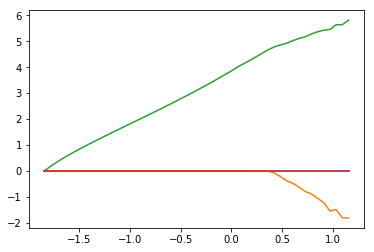


Done(*_*)


In [62]:
# plot without tolerance
plt.plot(np.log10(cs2),coefs2)
plt.show()

print(s)

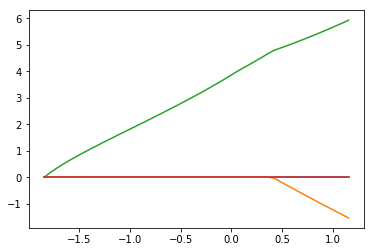

In [35]:
# using tolerance value of 1e-6
plt.plot(np.log10(cs2),coefs2)
plt.show()

(50, 4)
(4,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


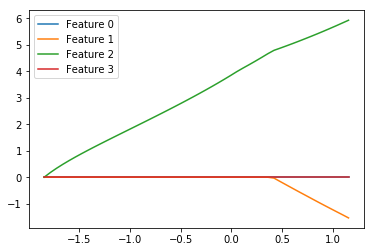

In [59]:
# print(np.array(coefs2).shape)
# print(coefs2[0].shape)
# print(np.array(coefs2)[:,0])

## plotting features seperately

plt.plot(np.log10(cs2),np.array(coefs2)[:,0],label='Feature 0')
plt.plot(np.log10(cs2),np.array(coefs2)[:,1],label='Feature 1')
plt.plot(np.log10(cs2),np.array(coefs2)[:,2],label='Feature 2')
plt.plot(np.log10(cs2),np.array(coefs2)[:,3],label='Feature 3')
plt.legend()
plt.show()

# Plot multinomial and One-vs-Rest Logistic Regression

#### Import Statements

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

s = "\nDone(*_*)"
print(s)


Done(*_*)


#### Creating dataset

In [107]:
centers = [[-5,0],[0,5],[5,-1.5]]
X,y = make_blobs(n_samples=1000,centers=centers,random_state=40)
""" 
# Data Desciption
print(X.shape)
print(y.shape)
print(X)
print(y)
"""
transform = np.array([[0.4,0.2],[-.4,1.2]])
X_ = np.dot(X,transform)

print(s)


Done(*_*)


#### Plotting

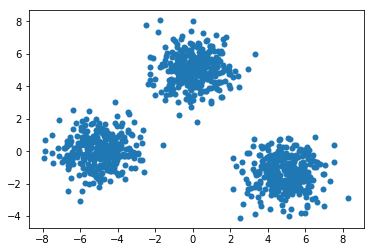

In [108]:
## Plotting raw data
plt.scatter(X[:,0],X[:,1],linewidths='.01')
plt.show()

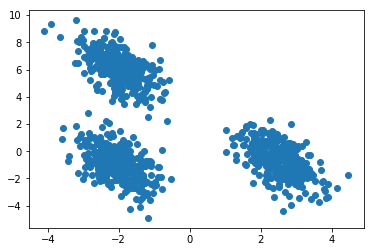


Done(*_*)


In [109]:
## plotting data after transformation 
"""
    [[ 0.4, 0.2],
     [-0.4, 1.2]]
"""

#X_ = np.dot(X,np.array([[0.4,0.2],[-.4,1.2]]))
#print(X_.shape)
plt.scatter(X_[:,0],X_[:,1])
plt.show()

print(s)

C:\Users\I348567\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[[-1.80172727 -1.26677184]
 [-0.07201836  1.53663114]
 [ 1.87374563 -0.2698593 ]]
[ 1.29552142 -2.53925136  1.24372994]
-8.91223687714 9.30552368641 -5.09448199729 9.04893601458


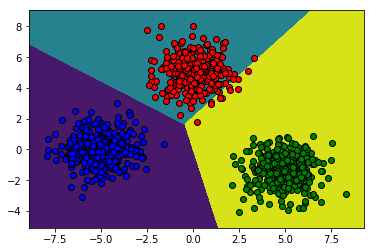

[[-3.29132554 -2.07634702]
 [-0.15574923  2.75777945]
 [ 3.30694139 -0.11346459]]
[-1.42593029 -7.62908891 -1.08042986]
-8.91223687714 9.30552368641 -5.09448199729 9.04893601458


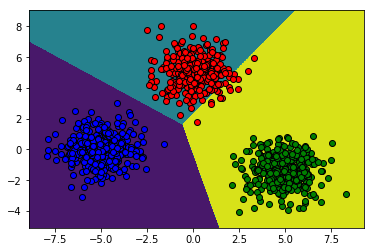


Done(*_*)


In [118]:
## Actual Plot
for cls in ("multinomial","ovr"):
    LR_clf = LogisticRegression(multi_class=cls,solver='sag',max_iter=100,random_state=42).fit(X_,y)
    #print(LR_clf.score)
    print(LR_clf.coef_)
    print(LR_clf.intercept_)
    
    h = .02
    x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
    print(x_min,x_max,y_min,y_max)
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    Z = LR_clf.predict(np.c_[xx.ravel(),yy.ravel()])
    plt.contourf(xx,yy,Z.reshape(xx.shape))
    
    ## plotting data point
    colors = "brg"
    for cls,color in zip(LR_clf.classes_,colors):
        idx = np.where(y == cls)
        plt.scatter(X[idx,0],X[idx,1],c=color,edgecolor='black')
    
    xmin,xmax = plt.xlim()
    coeffs = LR_model.coef_
    intercept = LR_model.intercept_
    ## plotting hyperplane
    def y_compute(x,cls):
        return (-(x*coeff[cls,0]-interce)/coeff[cls,1])
    def plot_hyperplane(cls,color):
        plt.plot([xmin,xmax],[],ls='--',c=color)
    for cls,color in zip(LR_clf.classes_,colors):
        plot_hyperplane(i,color)
    
    
    
    plt.show()
#     print(Z.shape)
#     print(xx.shape,yy.shape)
#     print(xx)
#     print(yy)
#     print(xx == yy)
    
print(s)

## Testing 

In [ ]:
print(np.logspace(0,3).shape)

In [95]:
print(np.arange(x_min,x_max,h).shape)
print(np.arange(y_min,y_max,h).shape)

(895,)
(704,)


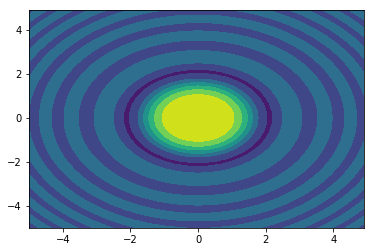

[[-0.0052475  -0.01939806 -0.01651205 ...,  0.00071954 -0.01651205
  -0.01939806]
 [-0.01939806 -0.01626204  0.00156902 ...,  0.01852793  0.00156902
  -0.01626204]
 [-0.01651205  0.00156902  0.01875796 ...,  0.02020437  0.01875796
   0.00156902]
 ..., 
 [ 0.00071954  0.01852793  0.02020437 ...,  0.00444585  0.02020437
   0.01852793]
 [-0.01651205  0.00156902  0.01875796 ...,  0.02020437  0.01875796
   0.00156902]
 [-0.01939806 -0.01626204  0.00156902 ...,  0.01852793  0.00156902
  -0.01626204]]


In [42]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
plt.contourf(x,y,z)
plt.show()
print(z)

In [46]:
df = pd.DataFrame(yy)
print(df)

      0
0  -5.0
1  -4.9
2  -4.8
3  -4.7
4  -4.6
5  -4.5
6  -4.4
7  -4.3
8  -4.2
9  -4.1
10 -4.0
11 -3.9
12 -3.8
13 -3.7
14 -3.6
15 -3.5
16 -3.4
17 -3.3
18 -3.2
19 -3.1
20 -3.0
21 -2.9
22 -2.8
23 -2.7
24 -2.6
25 -2.5
26 -2.4
27 -2.3
28 -2.2
29 -2.1
..  ...
70  2.0
71  2.1
72  2.2
73  2.3
74  2.4
75  2.5
76  2.6
77  2.7
78  2.8
79  2.9
80  3.0
81  3.1
82  3.2
83  3.3
84  3.4
85  3.5
86  3.6
87  3.7
88  3.8
89  3.9
90  4.0
91  4.1
92  4.2
93  4.3
94  4.4
95  4.5
96  4.6
97  4.7
98  4.8
99  4.9

[100 rows x 1 columns]


In [74]:
print(xx.ravel().shape)
print(xx.ravel().shape)

(644988,)
(644988,)


In [76]:
print(np.array([1,2,3]).T.shape)

(3,)


In [84]:
np.c_[np.array([[1,2,3]]),[[0,0,0]], np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 0, 4, 5, 6]])

In [85]:
708*911

644988

In [116]:
print(LR_clf.coef_)
print(LR_clf.intercept_)

[[-3.29132554 -2.07634702]
 [-0.15574923  2.75777945]
 [ 3.30694139 -0.11346459]]
[-1.42593029 -7.62908891 -1.08042986]


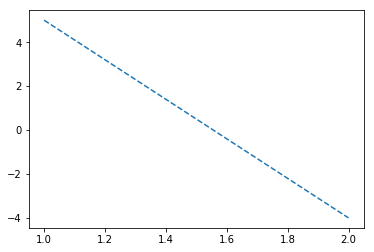

In [123]:
plt.plot([1,2],[5,-4],ls='--')
plt.show()